In [ ]:
!apt-get update --fix-missing

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

# Importing the file and removing punctuations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/wc on text based on user favourites.txt', 'r') as f: 
    x=f.read()
x=x.lower()

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')
y=tokenizer.tokenize(x)
filtered_sentence = (" ").join(y)

Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
file1 = open('/content/drive/My Drive/Colab Notebooks/out11.txt', 'w+') 
file1.write(filtered_sentence)
file1.close()

# Loading Spark into the system

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q !wget -q http://apache.osuosl.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
!pip install -U pyarrow

     |████████████████████████████████| 21.9MB 5.2MB/s 
  Found existing installation: pyarrow 3.0.0
    Uninstalling pyarrow-3.0.0:
      Successfully uninstalled pyarrow-3.0.0


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession

In [ ]:
if __name__ == "__main__":
	
	# create Spark context with necessary configuration
	sc = SparkContext("local","PySpark Word Count Exmaple")

# Removing Stop words and doing Word count using MapReduce

In [ ]:
from pyspark.ml.feature import StopWordsRemover

# Define a list of stop words or use default list
remover = StopWordsRemover()
stop_words = remover.getStopWords() 
  # read data from text file and split each line into words
words = sc.textFile('/content/drive/My Drive/Colab Notebooks/out11.txt').flatMap(lambda line: line.split(" "))
# Convert the words in lower case and remove stop words from stop_words
splitRDD_no_stop = words.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word 
wordCounts = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)
#wordCounts= words.map(lambda word: (word, 1)).reduceByKey(lambda a,b:a +b)

# Sorting the words in descending order based on hteir count.

In [ ]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [ ]:
wordCounts=wordCounts.sortByKey(False)

In [ ]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [ ]:
wordCounts.take(100)

[('patient', 63486),
 ('covid', 37852),
 ('vaccine', 36634),
 ('19', 27965),
 ('dose', 24873),
 ('received', 20877),
 ('arm', 18919),
 ('pain', 17677),
 ('reported', 17043),
 ('injection', 15024),
 ('events', 13924),
 ('pfizer', 13308),
 ('left', 13122),
 ('headache', 12828),
 ('first', 12562),
 ('report', 12273),
 ('unknown', 12272),
 ('1', 12129),
 ('2', 11961),
 ('lot', 11951),
 ('day', 11715),
 ('vaccination', 11697),
 ('fever', 11538),
 ('unspecified', 11458),
 ('site', 10665),
 ('bnt162b2', 10418),
 ('medical', 10374),
 ('history', 10236),
 ('days', 10187),
 ('number', 10105),
 ('hours', 10051),
 ('chills', 9669),
 ('date', 9529),
 ('symptoms', 9231),
 ('event', 9046),
 ('outcome', 8850),
 ('2021', 8763),
 ('information', 8519),
 ('body', 8470),
 ('spontaneous', 8430),
 ('concomitant', 8299),
 ('old', 8245),
 ('included', 8209),
 ('felt', 8148),
 ('experienced', 7887),
 ('medications', 7762),
 ('administration', 7748),
 ('started', 7631),
 ('3', 7390),
 ('right', 7274),
 ('single

# Saving top 100 words

In [ ]:
xy=wordCounts.take(200)

In [ ]:
zz=list()
gg=list()
for xx in xy:
  zz.append(xx[1])
  gg.append(xx[0])

hell=" "
noo=0
for yy in zz:
  for ll in range(yy):
    hell+=(str(gg[noo]))
    hell+=" "
  noo+=1

In [ ]:
file1 = open('/content/drive/My Drive/Colab Notebooks/out_task_temp.txt', 'w+') 
file1.write(hell)
file1.close()

# Forming Word Cloud for top 100 words

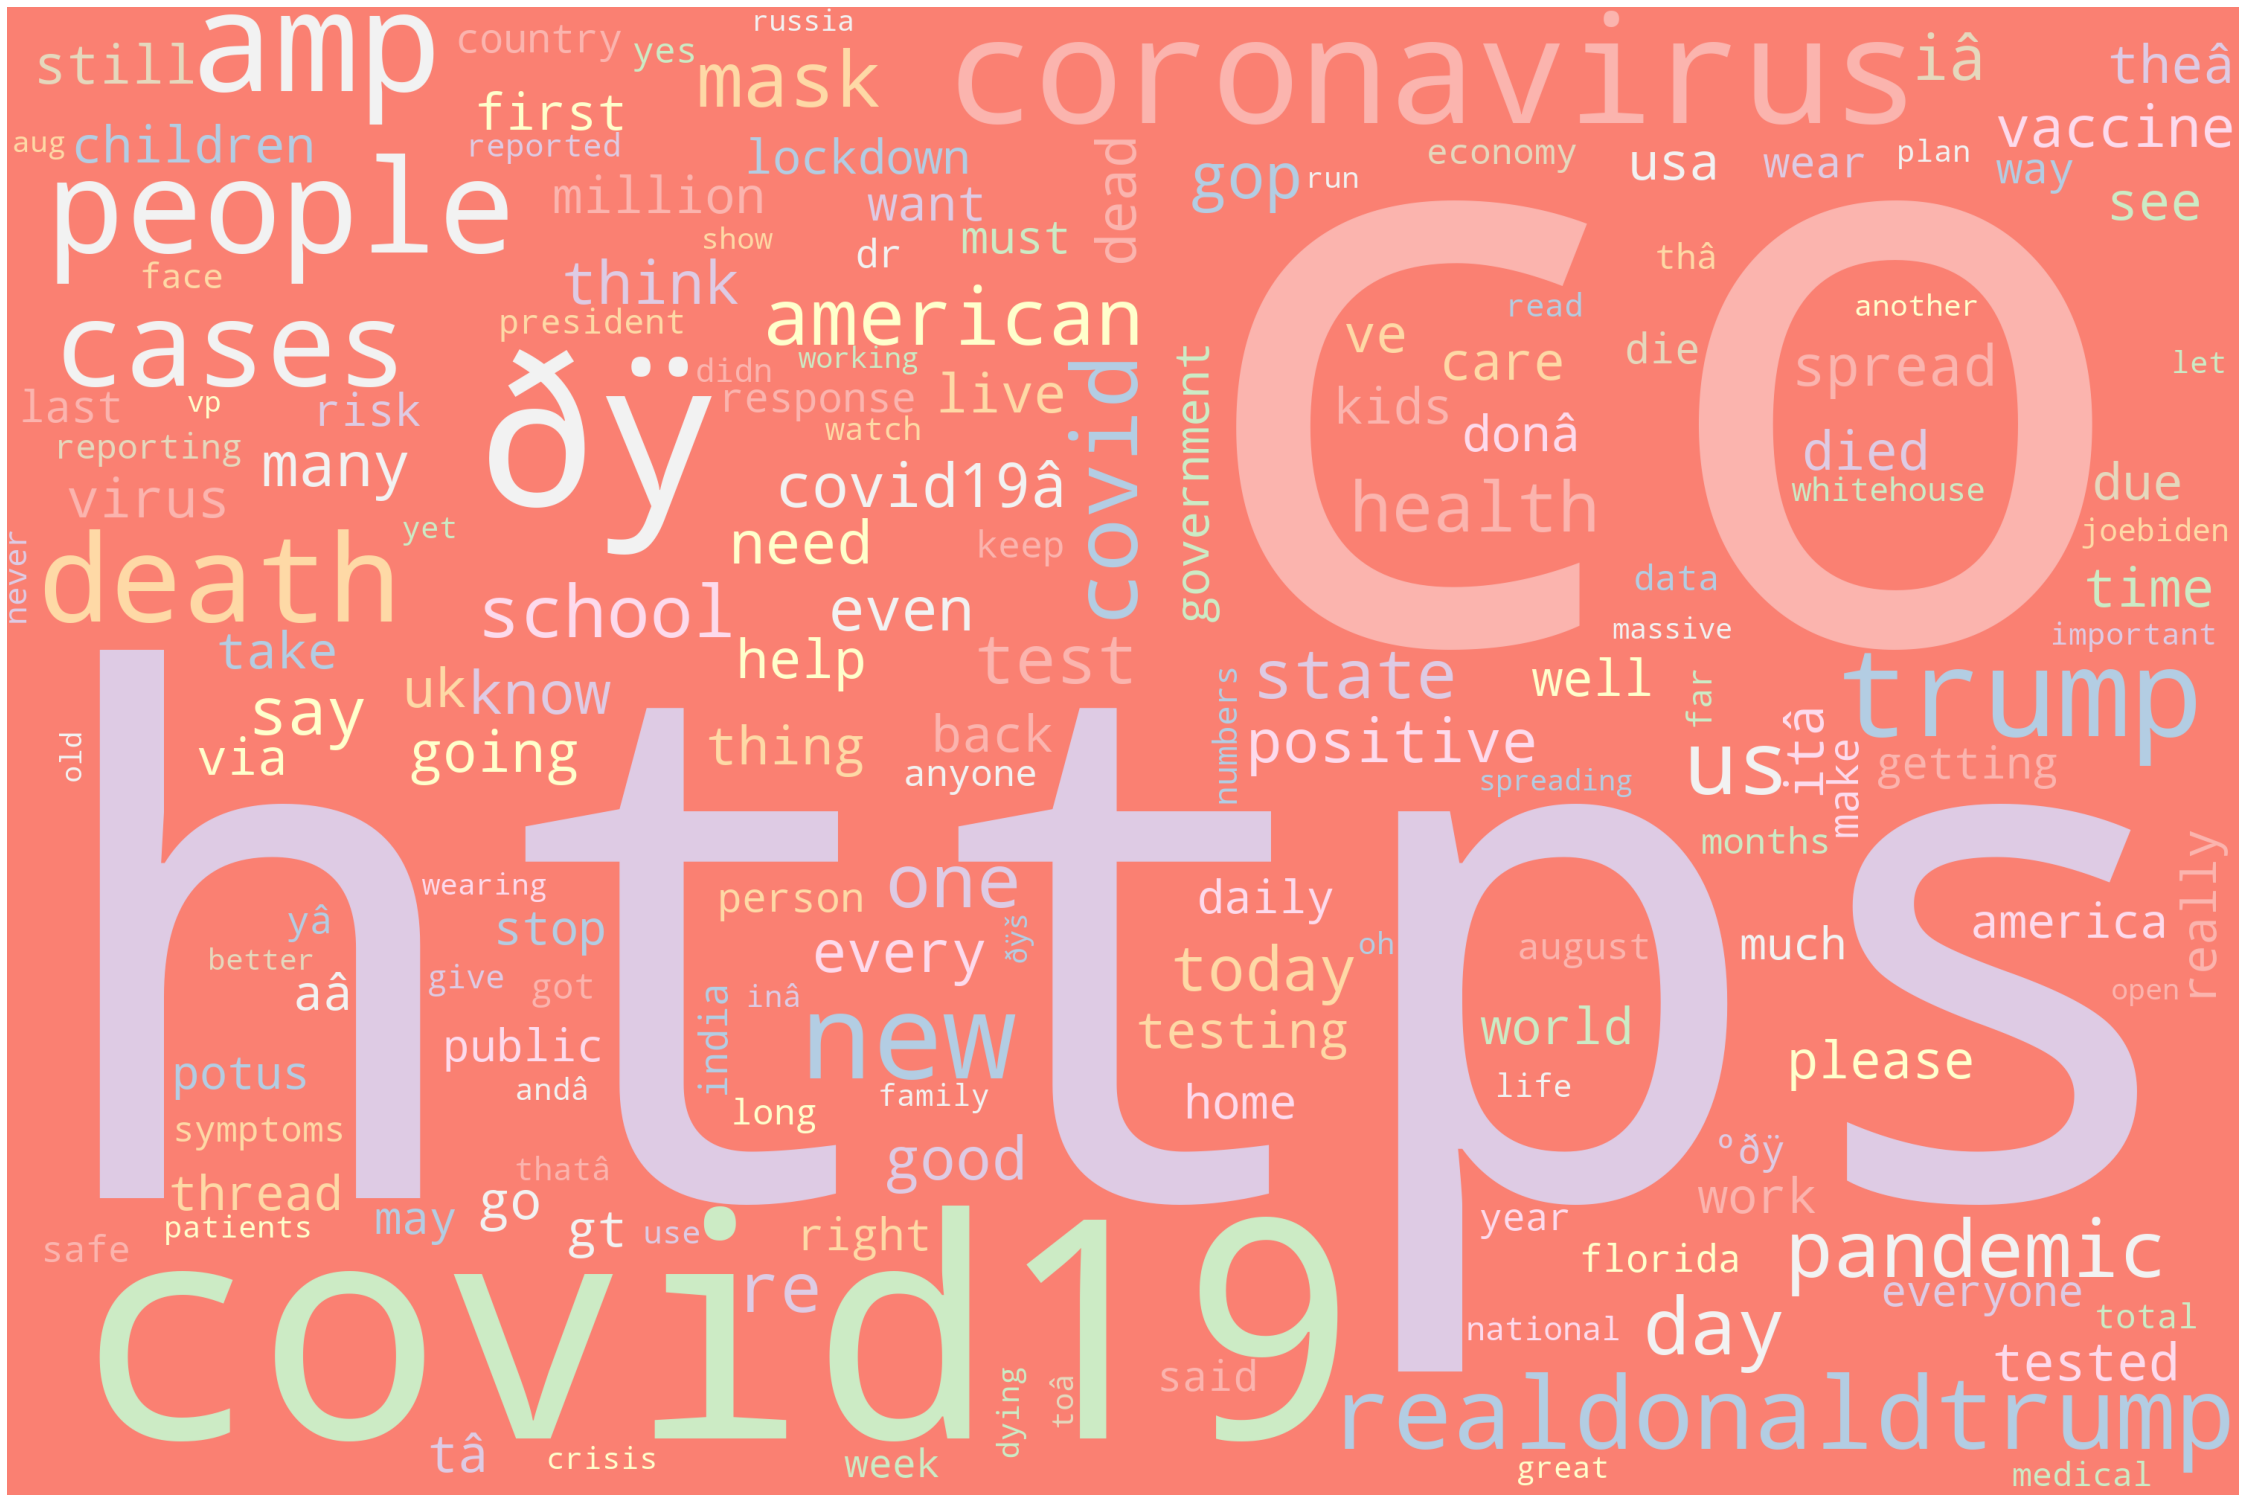

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/out_task_temp.txt', 'r') as f: 
    x=f.read()
x=x.lower()

import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(x)
wordcloud.to_file('/content/drive/My Drive/Colab Notebooks/wc on text based on user favourites.png')
# Plot
plot_cloud(wordcloud)